<a href="https://colab.research.google.com/github/nuvita97/Temperature-Prediction/blob/main/Humidity_%26_Temp_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nuvita97/Temperature-Prediction

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
path = 'Temperature-Prediction'
os.chdir(path)
os.listdir()

Cloning into 'Temperature-Prediction'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


['README.md', 'Humidity_Temp_Prediction.csv', '.git']

In [5]:
data = pd.read_csv('Humidity_Temp_Prediction.csv', delimiter = ';')

print(data.shape)
print(data.head())

(619999, 4)
     id  temp  humidity            date_time
0  9197    21        20  2016-08-17 00:00:01
1  9198    21        20  2016-08-17 00:01:01
2  9199    21        20  2016-08-17 00:02:01
3  9200    21        20  2016-08-17 00:03:01
4  9201    21        20  2016-08-17 00:04:01


In [6]:
data.dtypes

id            int64
temp          int64
humidity      int64
date_time    object
dtype: object

In [9]:
# Change type to datetime
data['date_time'] = pd.to_datetime(data['date_time'])
data.dtypes

id                    int64
temp                  int64
humidity              int64
date_time    datetime64[ns]
minute                int64
dtype: object

In [11]:
# Use MINUTES IN A DAY to predict Humidity & Temp (60*20 = 1440 values) 
# Feature Engineering: date_time => minute

data['minute'] = data['date_time'].dt.minute + data['date_time'].dt.hour * 60

print(data['minute'].min())
print(data['minute'].max())
data

0
1439


,id,temp,humidity,date_time,minute
0,9197,21,20,2016-08-17 00:00:01,0
1,9198,21,20,2016-08-17 00:01:01,1
2,9199,21,20,2016-08-17 00:02:01,2
3,9200,21,20,2016-08-17 00:03:01,3
4,9201,21,20,2016-08-17 00:04:01,4
...,...,...,...,...,...
619994,629191,18,21,2017-12-17 03:13:01,193
619995,629192,18,21,2017-12-17 03:14:02,194
619996,629193,18,21,2017-12-17 03:15:02,195
619997,629194,19,20,2017-12-17 03:16:01,196


In [14]:
feature = 'minute'
target = 'temp'

# Group minute from 0 to 1439 & calculate Mean for each minute
minute_group = data.loc[:, [feature, target]].groupby(feature, as_index = False).mean()
minute_group

,minute,temp
0,0,19.161731
1,1,19.153318
2,2,19.169683
3,3,19.152273
4,4,19.141230
...,...,...
1435,1435,19.178490
1436,1436,19.155606
1437,1437,19.157895
1438,1438,19.132118


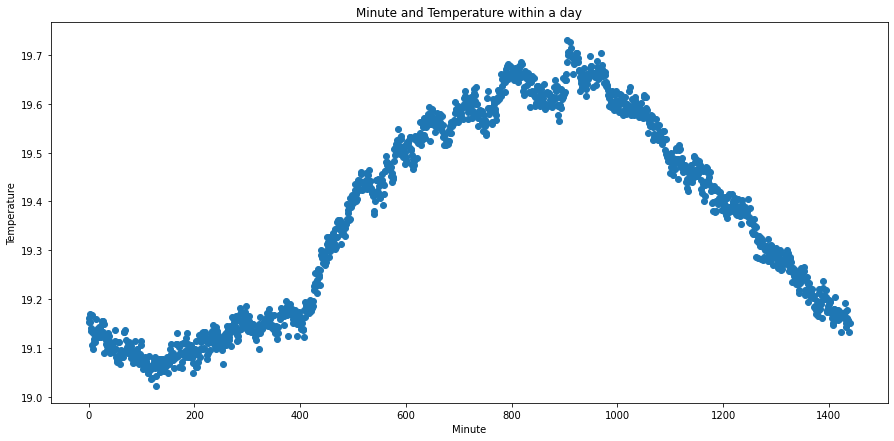

In [15]:
plt.figure(figsize = (15, 7))
plt.scatter(minute_group["minute"], minute_group["temp"])
plt.title("Minute and Temperature within a day")
plt.xlabel("Minute")
plt.ylabel("Temperature")
plt.show()

In [ ]:
featurex = 'minute'
featurey = 'temp'

X = data[featurex] # Learn on X
y = data[featurey] # Predict y

print(X)
print(y)
